<a href="https://colab.research.google.com/github/KavyaGandu/Data-mining/blob/main/Lasso_and_Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ridge eregression: It is an extension of linear regression where the loss func is modified to minimize the complexiy of the model Loss function = OLS + alpha * summation (squared coefficient values)


Lasso regression:
Least absolute shrinkage and selection operator is a modification of linear regression.In lasso  fun is modified to min the complexity of model by limiting the sum of absolute values of model coeffivients



In [17]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



set x and y for glmnet  unlike linear

In [18]:
library(glmnet)

In [19]:
load("/prostate (1).RData")

In [20]:
dim(prostate)

[1] 97 10

In [21]:
head(prostate)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<lgl>
1,-0.5798185,2.769459,50,-1.386294,0,-1.386294,6,0,-0.4307829,TRUE
2,-0.9942523,3.319626,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
3,-0.5108256,2.691243,74,-1.386294,0,-1.386294,7,20,-0.1625189,TRUE
4,-1.2039728,3.282789,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
5,0.7514161,3.432373,62,-1.386294,0,-1.386294,6,0,0.3715636,TRUE
6,-1.0498221,3.228826,50,-1.386294,0,-1.386294,6,0,0.7654678,TRUE


In [23]:
#break data intlo X and Y      X is response

In [24]:
X <- prostate[,1:8]
Y <- prostate[,9]

In [28]:
dim(X)

[1] 97  8

In [29]:
length(Y)  #vector

[1] 97

In [31]:
grid <- 10^seq(10,-2,length = 100)

In [ ]:
grid

In [33]:
#ridge model
ridge_mod <- glmnet(X,Y,alpha =0,lambda = grid) #ridge penality

In [34]:
#lasso
lasso_mod <- glmnet(X,Y,alpha =1,lambda = grid) #lasso penality

In [35]:
names(ridge_mod)

[1] "a0"        "beta"      "df"        "dim"       "lambda"    "dev.ratio"
 [7] "nulldev"   "npasses"   "jerr"      "offset"    "call"      "nobs"

In [36]:
coef(ridge_mod)

  [[ suppressing 100 column names ‘s0’, ‘s1’, ‘s2’ ... ]]



9 x 100 sparse Matrix of class "dgCMatrix"
                                                                            
(Intercept) 2.478387e+00 2.478387e+00 2.478387e+00 2.478387e+00 2.478387e+00
lcavol      8.260413e-11 1.091978e-10 1.443531e-10 1.908263e-10 2.522611e-10
lweight     1.340776e-10 1.772427e-10 2.343044e-10 3.097367e-10 4.094537e-10
age         3.019569e-12 3.991693e-12 5.276783e-12 6.975597e-12 9.221328e-12
lbph        1.642903e-11 2.171821e-11 2.871019e-11 3.795319e-11 5.017188e-11
svi         1.813000e-10 2.396680e-10 3.168270e-10 4.188266e-10 5.536641e-10
lcp         5.202940e-11 6.877981e-11 9.092286e-11 1.201947e-10 1.588903e-10
gleason     6.773326e-11 8.953939e-11 1.183658e-10 1.564726e-10 2.068476e-10
pgg45       1.984884e-12 2.623900e-12 3.468641e-12 4.585340e-12 6.061549e-12
                                                                            
(Intercept) 2.478387e+00 2.478387e+00 2.478387e+00 2.478387e+00 2.478387e+00
lcavol      3.334743e-10 4.408334

In [37]:
dim(coef(ridge_mod))

[1]   9 100

In [40]:
dim(coef(lasso_mod))

[1]   9 100

In [46]:
# prdeiction
predict(ridge_mod, s=.0005, newx = as.matrix(X[1:5,]),type = "response")

,s1
1,0.8303789
2,0.7773245
3,0.4629256
4,0.6383083
5,1.7317455


In [47]:
predict(lasso_mod, s=.0005, newx = as.matrix(X[1:5,]),type = "response")

,s1
1,0.8375133
2,0.8054608
3,0.5182495
4,0.6700057
5,1.7473552


In [48]:
predict(ridge_mod, s=.0005,type = "coefficients")
predict(lasso_mod, s=.0005,type = "coefficients")

9 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  0.151011516
lcavol       0.553882957
lweight      0.620449634
age         -0.020607196
lbph         0.095120620
svi          0.750074993
lcp         -0.095715187
gleason      0.051957450
pgg45        0.004273852

9 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  0.186068274
lcavol       0.540424710
lweight      0.600399773
age         -0.017300296
lbph         0.086635670
svi          0.692713966
lcp         -0.057681372
gleason      0.034527447
pgg45        0.003554564

Warning message in quartz():
“Quartz device is not available on this platform”


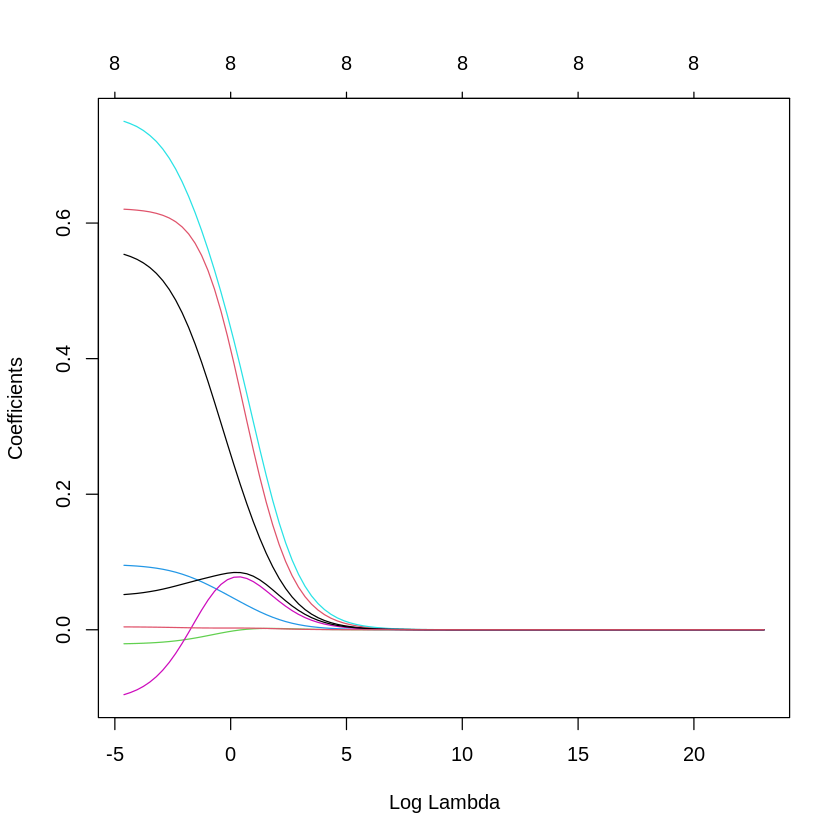

In [53]:
quartz()
plot(ridge_mod,xvar ="lambda")

In [54]:
#redo for default lambda
ridge_mod <- glmnet(X,Y,alpha =0)
lasso_mod<- glmnet(X,Y,alpha =0)


Warning message in quartz():
“Quartz device is not available on this platform”


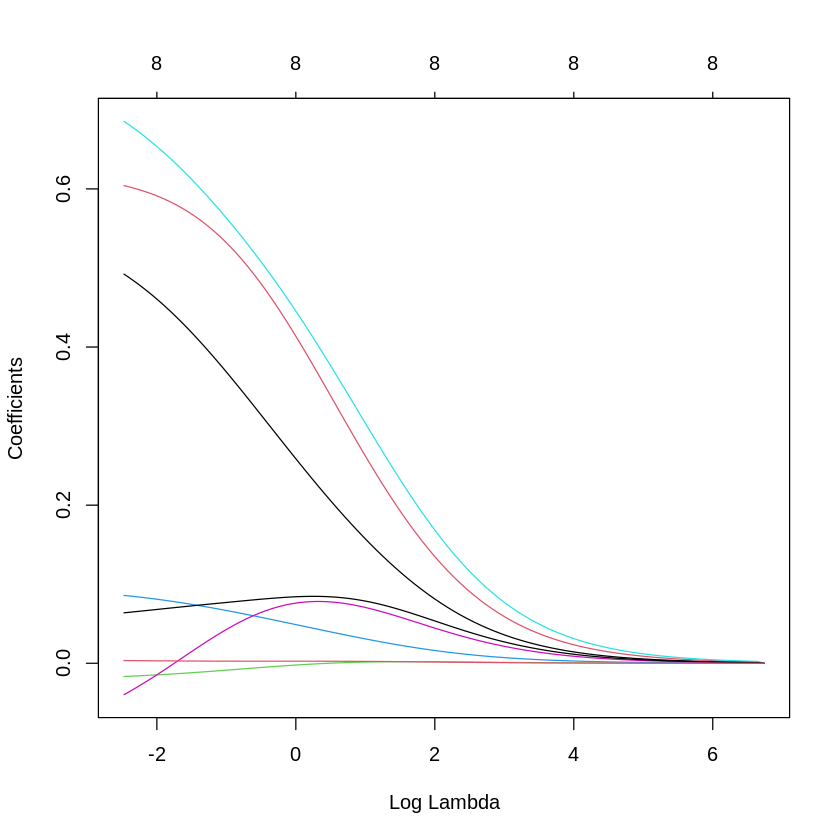

In [55]:
quartz()
plot(ridge_mod,xvar= "lambda")

Warning message in quartz():
“Quartz device is not available on this platform”


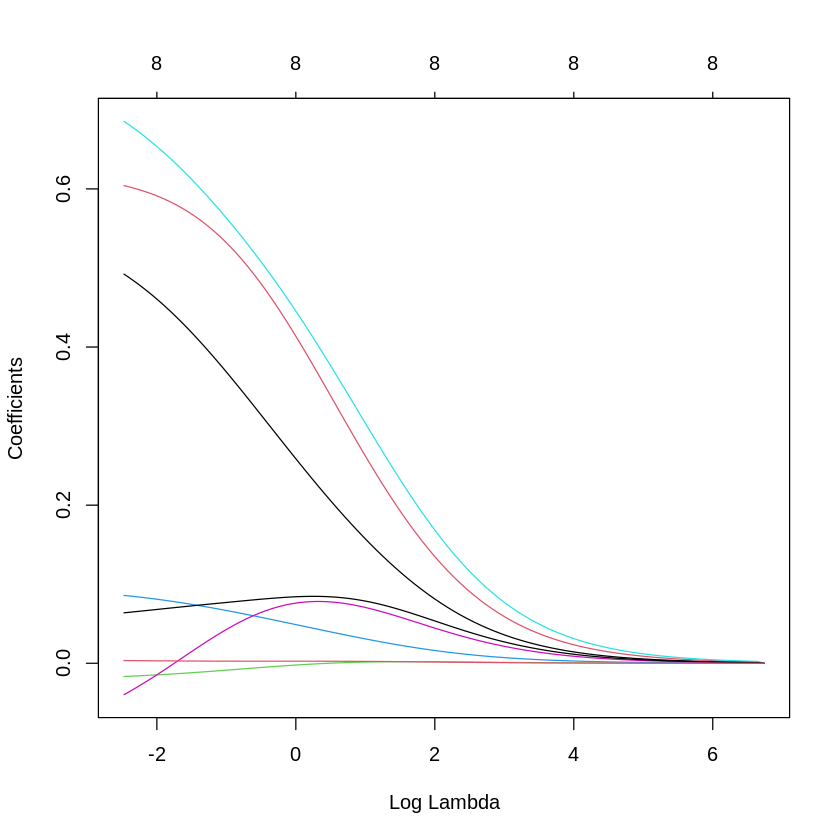

In [58]:
quartz()
plot(lasso_mod,xvar= "lambda")

# Try cross-validation - select and optical lambda

In [60]:
#divide the data into test and validation /train

In [ ]:
#training --> cross-validation --> select a lambda
#test ---> model --> evaluate perfomance


In [61]:
set.seed(123)

In [73]:
indis <- sample(1:length(Y),size=(2/3)*length(Y),replace =  FALSE)
X_train <-as.matrix(X[indis, ])
Y_train <- Y[indis]
X_test <- as.matrix(X[-indis, ])
Y_test <- Y [-indis]

In [74]:
cv.out <- cv.glmnet(X_train, Y_train, alpha = 1)


In [75]:
sel <- cv.out$lambda.min

In [76]:
sel

[1] 0.01945724

Warning message in quartz():
“Quartz device is not available on this platform”


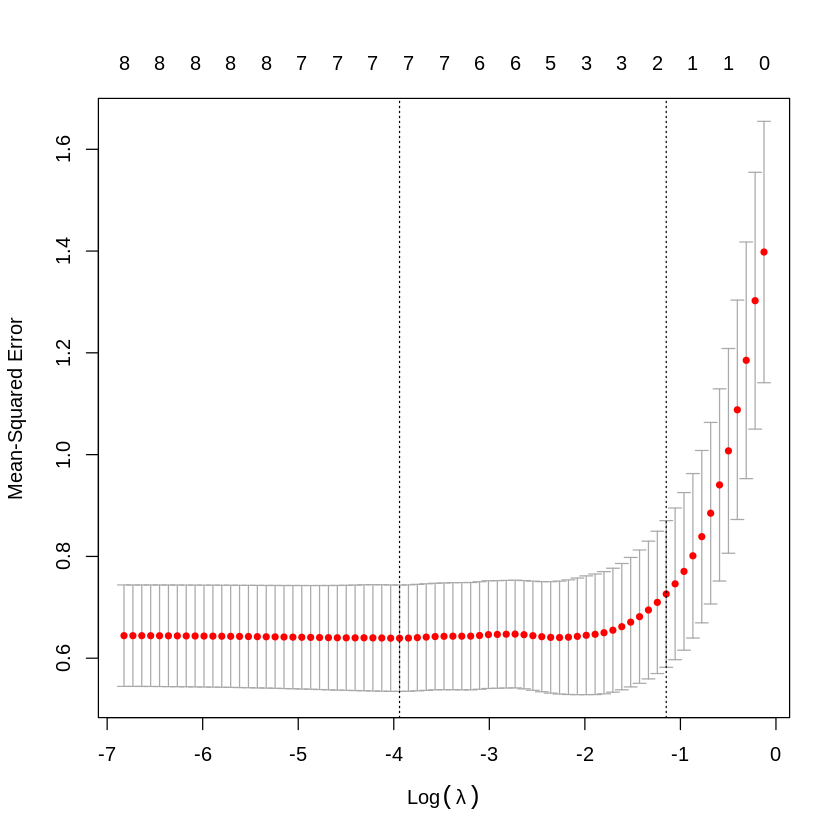

In [78]:
quartz()
plot(cv.out)

In [80]:
log(sel)

[1] -3.939536

In [81]:
cv.out$lambda.1se #value of the regularization parameter (lambda) chosen based on cross-validation that is one standard error away from the lambda
#that gives the minimum cross-validated error.

[1] 0.3171045

In [82]:
log(cv.out$lambda.1se)

[1] -1.148524

In [87]:
lasso_pred <- predict(cv.out, s = sel, type = "coefficients")

In [88]:
lasso_pred

9 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  1.180575385
lcavol       0.608595138
lweight      0.395691464
age         -0.018164848
lbph         0.051820919
svi          0.497082170
lcp         -0.063858802
gleason      .          
pgg45        0.003616621

In [90]:
Y_train_hat <- predict(cv.out, s = sel, newx=X_train,type = "response")

In [91]:
Y_test_hat <- predict(cv.out, s = sel, newx=X_test,type = "response")

In [93]:
Y_train_hat

,s1
3,0.679413
7,1.961508
68,2.996771
53,2.095335
24,2.650728
95,3.653374
67,2.972326
11,1.597649
74,3.260629
87,3.008991


In [95]:
MSE_train <- (1/length(Y_train))*(sum((Y_train_hat- Y_train)^2))

In [96]:
MSE_test <- (1/length(Y_test))*(sum((Y_test_hat- Y_test)^2))

In [97]:
MSE_test
MSE_train

[1] 0.4154644

[1] 0.4952184